# 数据处理示例
***数据处理流程供参考，具体处理代码实现请针对具体数据做相应调整***

## 导入必要库

In [25]:
import numpy as np
import h5py
import os
from tqdm import tqdm
from netCDF4 import Dataset
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter

## 检查数据

In [26]:
# path = r"/data_new/copernicus_uv_data/raw_data/uovo_1997-01-01_to_1997-12-31.nc"
path = "demo.nc"  # 请填写你的数据集路径
dst = Dataset(path, mode='r', format="netCDF4") # 打开数据集
print(dst.variables.keys()) # 打印变量名

dict_keys(['depth', 'time', 'latitude', 'longitude', 'uo', 'vo'])


## 加载数据，查看shape

In [17]:
depth = dst.variables['depth'][:] # 深度
time = dst.variables['time'][:] # 时间
lat = dst.variables['latitude'][:]  # 纬度
lon = dst.variables['longitude'][:] # 经度
uo = dst.variables['uo'][:] # (T, depth, lat, lon)
vo = dst.variables['vo'][:] # (T, depth, lat, lon)
print(depth.shape, time.shape, lat.shape, lon.shape, uo.shape, vo.shape)

(1,) (2,) (2041,) (4320,) (2, 1, 2041, 4320) (2, 1, 2041, 4320)


## 查看统计量

In [ ]:
# 统计uo mean std min max q1 midian q3
uo_mean = uo.mean() 
uo_std = uo.std() 
uo_min = uo.min() 
uo_max = uo.max() 
vals   = uo.compressed()           # 1D ndarray，只有未被 mask 的元素，便于计算q1, median, q3
uo_q1, uo_median, uo_q3 = np.percentile(vals, [25, 50, 75])

print("uo mean:", uo_mean, "std:", uo_std, "min:", uo_min, "max:", uo_max, "q1:", uo_q1, "median:", uo_median, "q3:", uo_q3)

# 统计vo mean std min max q1 midian q3
vo_mean = vo.mean() 
vo_std = vo.std() 
vo_min = vo.min() 
vo_max = vo.max() 
vals   = vo.compressed()           # 1D ndarray，只有未被 mask 的元素，便于计算q1, median, q3
vo_q1, vo_median, vo_q3 = np.percentile(vals, [25, 50, 75])

print("vo mean:", vo_mean, "std:", vo_std, "min:", vo_min, "max:", vo_max, "q1:", vo_q1, "median:", vo_median, "q3:", vo_q3)

# 检查是否有nan值
print(f"uo has nan:{np.any(np.isnan(uo))}, vo has nan:{np.any( np.isnan(vo))}") # 检查数据中是否有NaN值

# 若有nan值，统计nan数量和比例
if np.any(np.isnan(uo)):
    uo_nan_count = np.isnan(uo).sum()
    uo_total_count = uo.size
    uo_nan_ratio = uo_nan_count / uo_total_count
    print(f"uo NaN count: {uo_nan_count}, total count: {uo_total_count}, NaN ratio: {uo_nan_ratio:.6f}")

if np.any(np.isnan(vo)):
    vo_nan_count = np.isnan(vo).sum()
    vo_total_count = vo.size
    vo_nan_ratio = vo_nan_count / vo_total_count
    print(f"vo NaN count: {vo_nan_count}, total count: {vo_total_count}, NaN ratio: {vo_nan_ratio:.6f}")

uo mean: 0.00244502692460539 std: 0.18391019239604742 min: -1.905575729906559 max: 1.90191350877285 q1: -0.07019257172942162 median: 0.0012207403779029846 q3: 0.07385479286313057
vo mean: 0.0015907712257329555 std: 0.14693193337487667 min: -2.1069978922605515 max: 2.2034363821148872 q1: -0.05798516795039177 median: 0.0024414807558059692 q3: 0.059816278517246246
uo has nan:False, vo has nan:False


## 查看数据分布

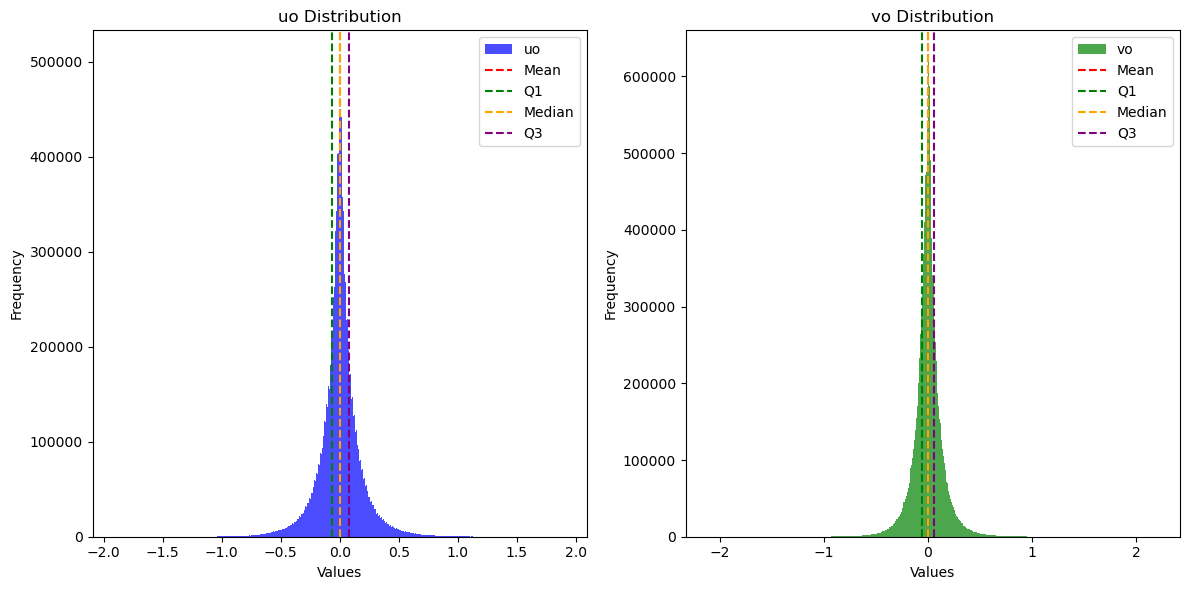

In [19]:
# 数据分布可视化
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(uo.compressed(), bins=500, color='blue', alpha=0.7, label='uo')
plt.axvline(uo_mean, color='red', linestyle='dashed', label='Mean')
plt.axvline(uo_q1, color='green', linestyle='dashed', label='Q1')
plt.axvline(uo_median, color='orange', linestyle='dashed', label='Median')
plt.axvline(uo_q3, color='purple', linestyle='dashed', label='Q3')
plt.title('uo Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(vo.compressed(), bins=500, color='green', alpha=0.7, label='vo')
plt.axvline(vo_mean, color='red', linestyle='dashed', label='Mean')
plt.axvline(vo_q1, color='green', linestyle='dashed', label='Q1')
plt.axvline(vo_median, color='orange', linestyle='dashed', label='Median')
plt.axvline(vo_q3, color='purple', linestyle='dashed', label='Q3')
plt.title('vo Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

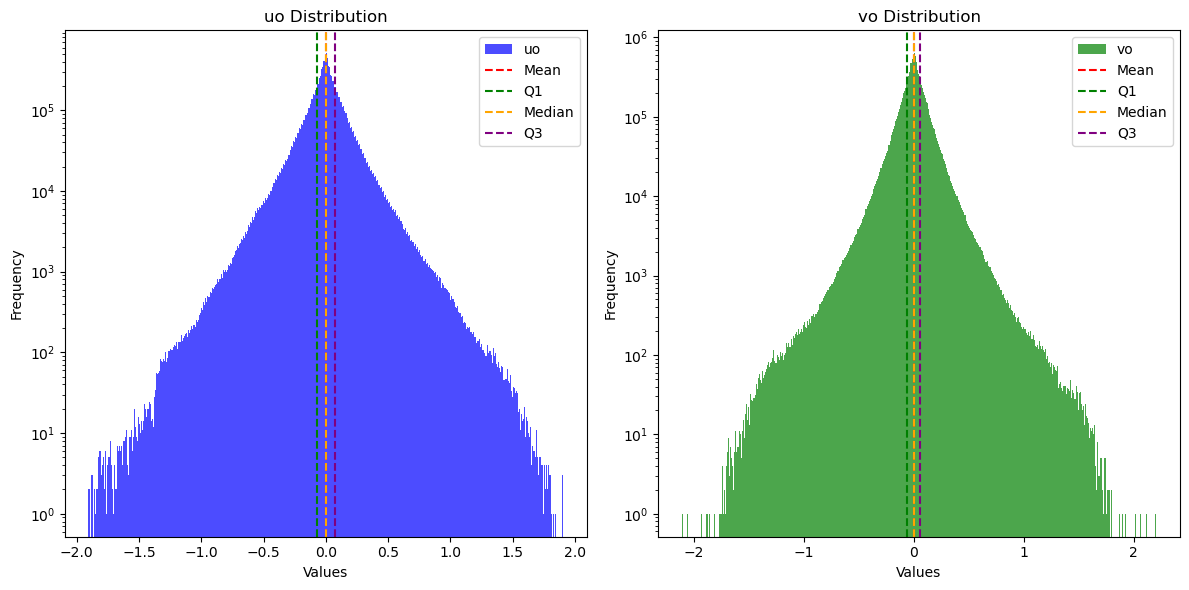

In [20]:
# 指数形式分布可视化
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(uo.compressed(), bins=500, color='blue', alpha=0.7, label='uo')
plt.axvline(uo_mean, color='red', linestyle='dashed', label='Mean')
plt.axvline(uo_q1, color='green', linestyle='dashed', label='Q1')
plt.axvline(uo_median, color='orange', linestyle='dashed', label='Median')
plt.axvline(uo_q3, color='purple', linestyle='dashed', label='Q3')
plt.title('uo Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.yscale('log')  # 使用对数尺度
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(vo.compressed(), bins=500, color='green', alpha=0.7, label='vo')
plt.axvline(vo_mean, color='red', linestyle='dashed', label='Mean')
plt.axvline(vo_q1, color='green', linestyle='dashed', label='Q1')
plt.axvline(vo_median, color='orange', linestyle='dashed', label='Median')
plt.axvline(vo_q3, color='purple', linestyle='dashed', label='Q3')
plt.title('vo Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.yscale('log')  # 使用对数尺度
plt.legend()
plt.tight_layout()
plt.show()

## 可视化一个例子
此处为可视化一天的数据

(2041, 4320) (2041, 4320)
uo is MaskedArray: True
vo is MaskedArray: True
(2041, 4320) (2041, 4320)
mean uo: 0.0034208972023173777 mean vo: 0.0022833040773414396
std uo: 0.18357807811180557 std vo: 0.1483367554244098


min uo: -1.905575729906559 min vo: -1.9281594268977642
max uo: 1.90191350877285 max vo: 2.1637623198330402


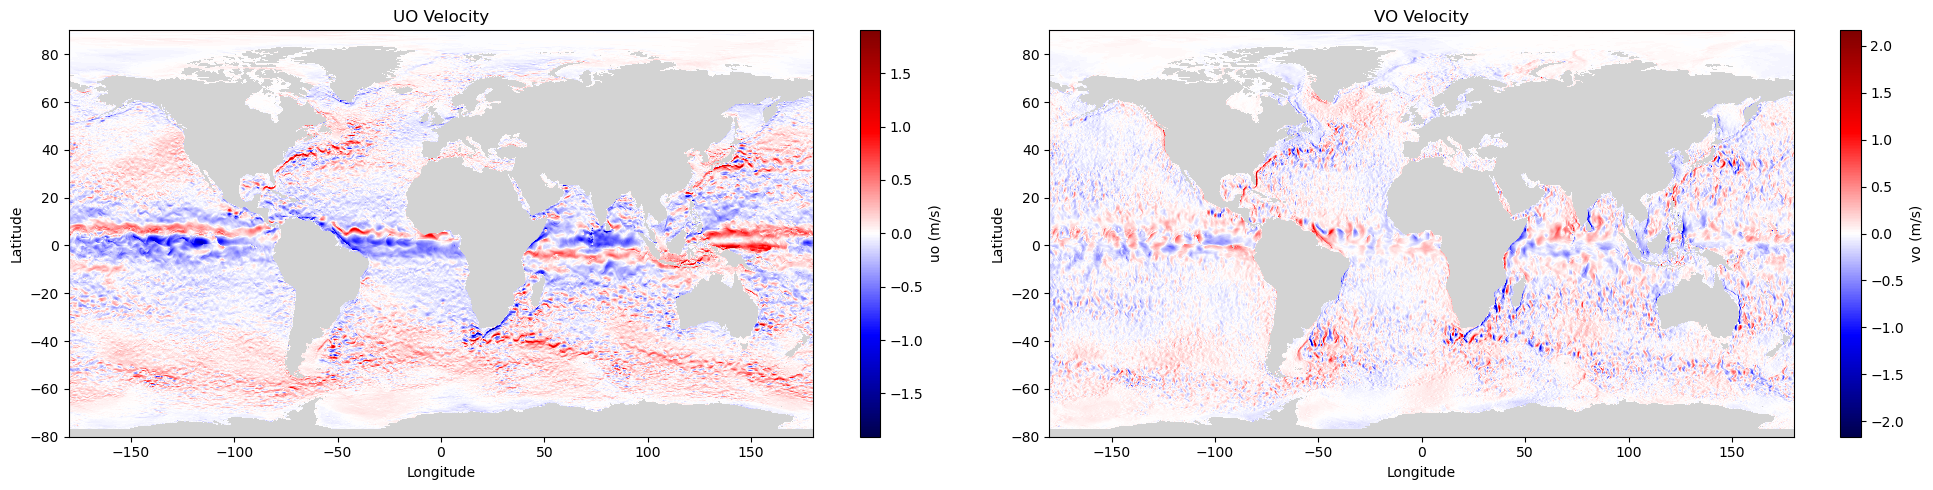

In [ ]:
fig_save_path = 'demo.png' # 请填写图片保存路径

lon_grid, lat_grid = np.meshgrid(lon, lat) # 创建经纬度网格
print(lon_grid.shape, lat_grid.shape)
print(f"uo is MaskedArray: {isinstance(uo, np.ma.MaskedArray)}") # 检查uo,vo是否为掩码数组
print(f"vo is MaskedArray: {isinstance(vo, np.ma.MaskedArray)}")
uo_day = uo[0, 0, :, :]  # 取第一个深度层
vo_day = vo[0, 0, :, :]  # 取第一个深度层
print(uo_day.shape, vo_day.shape)
# 打印统计信息
print("mean uo:", np.mean(uo_day), "mean vo:", np.mean(vo_day))
print("std uo:", np.std(uo_day), "std vo:", np.std(vo_day))
print("min uo:", np.min(uo_day), "min vo:", np.min(vo_day))
print("max uo:", np.max(uo_day), "max vo:", np.max(vo_day))
# 可视化全球速度场
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.pcolormesh(lon_grid, lat_grid, uo_day, shading='auto', cmap='seismic') # pcolormesh遇到掩码数组会自动处理掩码
plt.colorbar(label='uo (m/s)')
plt.title('UO Velocity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.gca().set_facecolor('lightgray')  # 设置背景颜色为浅灰色
plt.subplot(1, 2, 2)

plt.pcolormesh(lon_grid, lat_grid, vo_day, shading='auto', cmap='seismic', vmax=2.1637623198330402, vmin=-2.1637623198330402) # 设置颜色范围
plt.colorbar(label='vo (m/s)')
plt.title('VO Velocity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.gca().set_facecolor('lightgray')  # 设置背景颜色为浅灰色
plt.tight_layout()
plt.savefig(fig_save_path, dpi=300)
plt.show()

## 分析需求，数据处理
***分析需求，按需设计数据处理方式***

***先在少量数据上处理并debug，然后换为完全数据集***

由于此原数据集单个矩阵过大，此处用滑动窗口切片为小矩阵，以.h5形式存储

HDF5存储格式 的优点
1. 层级化结构

- 类似文件系统：可以有 组 (group) 和 数据集 (dataset)。

- 你可以在一个 .h5 文件里存储不同类型、不同维度的数据，还能附加 属性 (attributes)。

- 比如：
```
/train/images
/train/labels
/test/images
```
就像一个小型数据库，组织很清晰。

2. 高效存取大规模数据

- 支持 部分读取 (partial I/O)：你可以只读取一个很大的 dataset 里的某一块（切片），而不是整个读进内存。

- 读写速度快，底层有 二进制存储 + 压缩。

3. 支持压缩 & 节省存储空间

- 内置多种压缩方式（gzip、lzf 等），数据可以压缩存储。

- 读取时自动解压，对用户透明。

- 在气象/海洋模拟、遥感影像这类 体积巨大的多维数组 上，能大幅节省磁盘空间。

4. 扩展方便，支持追加写入

In [ ]:
# 滑动窗口切为448*448，步长为224，陆地超过80%判为无效数据，cycle padding，存为global_oceanData.h5
# 含uovo_data, mask, lon, lat四个数据，shape为(patch, 2, 448, 448)，(patch, 448, 448)，(patch, 448, 448)，(patch, 448, 448)，dtype为float32和bool，使用gzip压缩。


# --- 1. 配置参数 (您可以根据需要修改) ---
# 裁剪参数
PATCH_SIZE = 448
STRIDE = 224
LAND_THRESHOLD = 0.8  # 陆地占比超过这个阈值的数据块将被丢弃

# 输出文件和目录
OUTPUT_DIR = './' # 请填写输出目录路径
H5_FILE_PATH = os.path.join(OUTPUT_DIR, "demo.h5")

# 获取size
time_steps = uo.shape[0]  # 时间步数
depth = uo.shape[1]  # 深度层数
height = uo.shape[2]  # 纬度维度
width = uo.shape[3]   # 经度维度

def main():
    # 打印信息
    print("\n--- Data Shapes ---")
    print(f"lat: {lat.shape}")
    print(f"lon: {lon.shape}")
    print(f"uo: {uo.shape}")
    print(f"vo: {vo.shape}")
    print(f"Data type is np.ma.MaskedArray: {isinstance(uo, np.ma.MaskedArray)}")

    # --- 3. 创建输出目录和静态文件 ---
    print("\n--- Creating Output Directory and Static Files ---")
    if not os.path.exists(OUTPUT_DIR):
        os.makedirs(OUTPUT_DIR)
    
    # --- 4. 初始化HDF5文件 ---
    print("\n--- Initializing HDF5 File ---")
    with h5py.File(H5_FILE_PATH, 'w') as hf:
        # 创建一个可变尺寸的数据集来存储有效的数据块
        # 使用None来表示该维度是可变的
        # 启用分块和压缩以获得最佳性能和存储效率
        hf.create_dataset(
            'uovo_data',
            shape=(0, 2, PATCH_SIZE, PATCH_SIZE),  # 初始为空，(channel, height, width)
            maxshape=(None, 2, PATCH_SIZE, PATCH_SIZE), # 允许第一个维度无限增长
            dtype='float32',
            chunks=(1, 2, PATCH_SIZE, PATCH_SIZE), # 每次优化的读写单位
            compression="gzip" # 使用gzip压缩
        )
        hf.create_dataset(
            'mask',
            shape=(0, PATCH_SIZE, PATCH_SIZE),
            maxshape=(None, PATCH_SIZE, PATCH_SIZE),
            dtype='bool',
            chunks=(1, PATCH_SIZE, PATCH_SIZE),
            compression="gzip"
        )
        hf.create_dataset(
            'lon',
            shape=(0, PATCH_SIZE, PATCH_SIZE),
            maxshape=(None, PATCH_SIZE, PATCH_SIZE),
            dtype='float32',
            chunks=(1, PATCH_SIZE, PATCH_SIZE),
            compression="gzip"
        )
        hf.create_dataset(
            'lat',
            shape=(0, PATCH_SIZE, PATCH_SIZE),
            maxshape=(None, PATCH_SIZE, PATCH_SIZE),
            dtype='float32',
            chunks=(1, PATCH_SIZE, PATCH_SIZE),
            compression="gzip"
        )
    print(f"Initialized HDF5 file at: {H5_FILE_PATH}")

    # --- 5. 执行循环填充、裁剪和保存 ---
    print("\n--- Starting Cropping and Filtering Process ---")
    
    # 循环填充只需要在经度（宽度）维度上进行
    # 计算需要填充的宽度
    pad_width = STRIDE
    
    valid_patch_count = 0
    
    padded_lon = np.pad(lon, (pad_width, pad_width), mode='wrap')  # 对经度进行循环填充
    lon_grid, lat_grid = np.meshgrid(padded_lon, lat, indexing='xy')  # 创建经纬度网格
    # print(f"lon_grid shape: {lon_grid.shape}, lat_grid shape: {lat_grid.shape}")

    mask_day = uo.mask[0, 0, :, :]
    padded_mask = np.pad(mask_day, ((0, 0), (pad_width, pad_width)), mode='wrap')

    with h5py.File(H5_FILE_PATH, 'a') as hf:
        dset_uovo = hf['uovo_data']
        dset_mask = hf['mask']
        dset_lon = hf['lon']
        dset_lat = hf['lat']

        BUFFER_SIZE = 1  # 缓冲区大小，防止频繁写入磁盘，demo数据集很小，这里设置为1
        uovo_buffer = []
        mask_buffer = []
        lon_buffer = []
        lat_buffer = []

        # 使用tqdm来显示处理进度
        # 只获取一个patch
        for t in tqdm(range(time_steps), desc="Processing Days"): # 只处理第一天的数据，方便测试
            # 分别获取当天的数据和掩码
            uo_day_data = uo[t, 0, :, :].filled(np.nan) # 填充掩码部分为NaN，方便后续处理
            vo_day_data = vo[t, 0, :, :].filled(np.nan)

            # 对数据和掩码进行循环填充
            # np.pad的第二个参数是 ((before_axis_0, after_axis_0), (before_axis_1, after_axis_1), ...)
            padded_uo = np.pad(uo_day_data, ((0, 0), (pad_width, pad_width)), mode='wrap') # ((0, 0), (pad_width, pad_width))就表示在纬度方向不填充，在经度方向前后都填充pad_width个像素
            padded_vo = np.pad(vo_day_data, ((0, 0), (pad_width, pad_width)), mode='wrap')

            # 在填充后的数据上进行滑动窗口
            # 注意：纬度方向不填充，所以循环范围要小心处理边界
            # 遍历起始点
            for y in range(0, height - PATCH_SIZE + 1, STRIDE): # python切片左闭右开，要+1
                for x in range(0, width, STRIDE): # pad过了，经度方向现在可以完整地滑动，不会越界

                    # 从填充后的数据中裁剪
                    y_end = y + PATCH_SIZE
                    x_end = x + PATCH_SIZE # x的起点在填充后的坐标系中是 x + pad_width
                    
                    mask_patch = padded_mask[y:y_end, x : x_end]

                    # 计算陆地比例
                    land_ratio = np.sum(mask_patch) / (PATCH_SIZE * PATCH_SIZE)

                    # 如果是有效的数据块
                    if land_ratio < LAND_THRESHOLD:
                        valid_patch_count += 1
                        
                        uo_patch = padded_uo[y:y_end, x : x_end ]
                        vo_patch = padded_vo[y:y_end, x : x_end ]
                        lon_grid_patch = lon_grid[y:y_end, x : x_end]
                        lat_grid_patch = lat_grid[y:y_end, x : x_end]
                        
                        # 将 uo 和 vo 堆叠在通道维度
                        stacked_patch = np.stack([uo_patch, vo_patch], axis=0).astype(np.float32)

                        # 将数据添加到缓冲区
                        uovo_buffer.append(stacked_patch)
                        mask_buffer.append(mask_patch)
                        lon_buffer.append(lon_grid_patch)
                        lat_buffer.append(lat_grid_patch)

                    # 如果缓冲区达到一定大小，则写入HDF5文件
                    if len(uovo_buffer) >= BUFFER_SIZE:
                        dset_uovo.resize(dset_uovo.shape[0] + len(uovo_buffer), axis=0)
                        dset_uovo[-len(uovo_buffer):, ...] = np.array(uovo_buffer)

                        dset_mask.resize(dset_mask.shape[0] + len(mask_buffer), axis=0)
                        dset_mask[-len(mask_buffer):, ...] = np.array(mask_buffer)

                        dset_lon.resize(dset_lon.shape[0] + len(lon_buffer), axis=0)
                        dset_lon[-len(lon_buffer):, ...] = np.array(lon_buffer)

                        dset_lat.resize(dset_lat.shape[0] + len(lat_buffer), axis=0)
                        dset_lat[-len(lat_buffer):, ...] = np.array(lat_buffer)

                        # 清空缓冲区
                        uovo_buffer.clear()
                        mask_buffer.clear()
                        lon_buffer.clear()
                        lat_buffer.clear()

    print("\n--- Processing Complete ---")
    print(f"Total valid patches found and saved: {valid_patch_count}")
    print(f"Data saved to: {H5_FILE_PATH}")
    print(f"Total patches processed: {time_steps * (height // STRIDE) * (width // STRIDE)}")

if __name__ == '__main__':
    main()


--- Data Shapes ---
lat: (2041,)
lon: (4320,)
uo: (2, 1, 2041, 4320)
vo: (2, 1, 2041, 4320)
Data type is np.ma.MaskedArray: True

--- Creating Output Directory and Static Files ---

--- Initializing HDF5 File ---
Initialized HDF5 file at: ./demo.h5

--- Starting Cropping and Filtering Process ---


Processing Days:   0%|          | 0/2 [00:00<?, ?it/s]

Processing Days: 100%|██████████| 2/2 [00:11<00:00,  5.51s/it]


--- Processing Complete ---
Total valid patches found and saved: 294
Data saved to: ./demo.h5
Total patches processed: 342


## 对于数据较多的，debug好后复制进python脚本挂后台运行处理数据

## 检查处理好的数据

In [23]:
timestep = 0
data_path = 'demo.h5' # 填写上面生成的h5文件路径
with h5py.File(data_path, 'r') as hf:
    print(hf.keys())
    print(hf.visititems(lambda name, obj: print(f"{name}: {obj.shape}, {obj.dtype}")))
    uovo_data = hf['uovo_data'][timestep, ...]
    mask_data = hf['mask'][timestep, ...]
    lon_data = hf['lon'][timestep, ...]
    lat_data = hf['lat'][timestep, ...]
    print(type(uovo_data), type(mask_data), type(lon_data), type(lat_data))
    print(f"uovo_data shape: {uovo_data.shape}, dtype: {uovo_data.dtype}")
    print(f"mask_data shape: {mask_data.shape}, dtype: {mask_data.dtype}")
    print(f"lon_data shape: {lon_data.shape}, dtype: {lon_data.dtype}")
    print(f"lat_data shape: {lat_data.shape}, dtype: {lat_data.dtype}")

<KeysViewHDF5 ['lat', 'lon', 'mask', 'uovo_data']>
lat: (294, 448, 448), float32
lon: (294, 448, 448), float32
mask: (294, 448, 448), bool
uovo_data: (294, 2, 448, 448), float32
None
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
uovo_data shape: (2, 448, 448), dtype: float32
mask_data shape: (448, 448), dtype: bool
lon_data shape: (448, 448), dtype: float32
lat_data shape: (448, 448), dtype: float32


## 可视化一个例子

(448, 448) (448, 448)


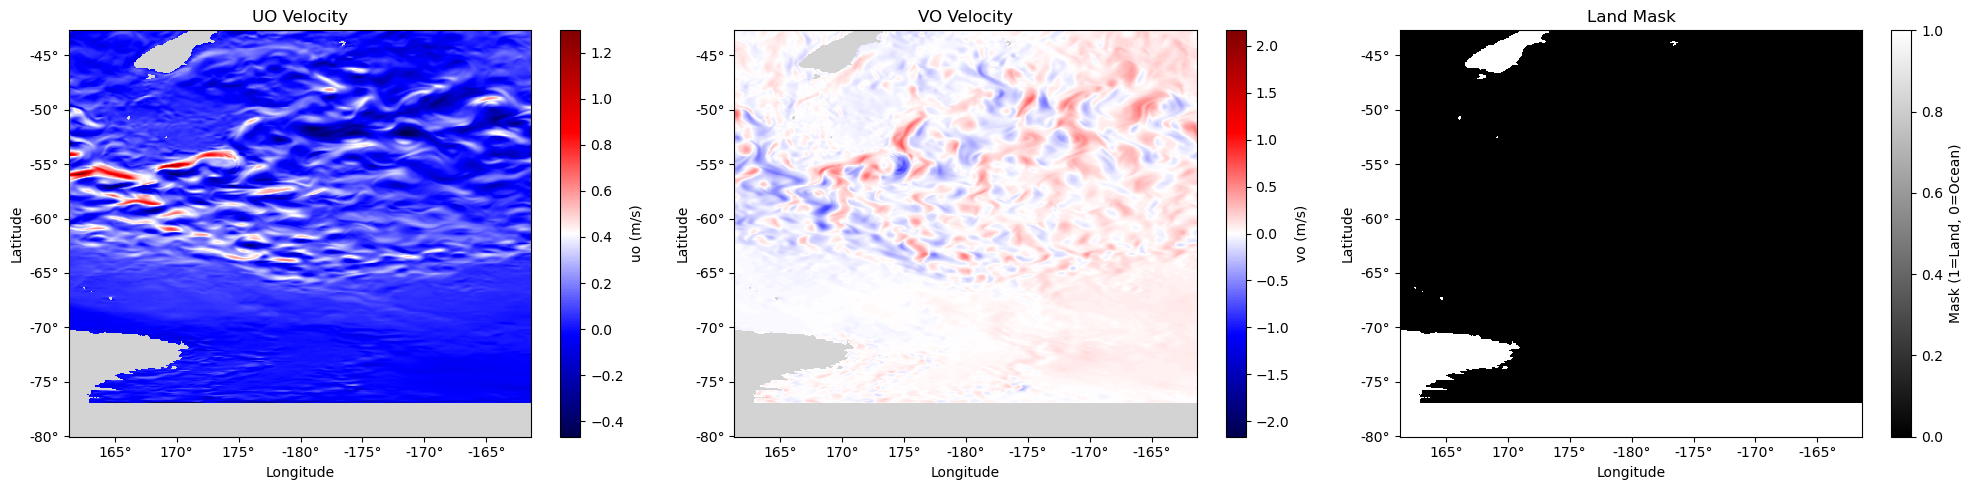

In [ ]:
fig_save_path = 'demo_processed.png' # 填写图片保存路径
# 经纬度格式化函数
def fmt(x, pos):
    val = ((x + 180) % 360) - 180
    return f"{val:.0f}°"

# 画图
uo_sample = uovo_data[0, :, :]  # 取第一个数据块的第一个通道
vo_sample = uovo_data[1, :, :]  # 取第一个数据块的第二个通道
mask_sample = mask_data
lon_sample = lon_data
lat_sample = lat_data
lon_unwrapped = np.rad2deg(np.unwrap(np.deg2rad(lon_sample)))  # unwrap经度
lat_unwrapped = np.rad2deg(np.unwrap(np.deg2rad(lat_sample)))
print(lon_unwrapped.shape, lat_unwrapped.shape)

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.pcolormesh(lon_unwrapped, lat_unwrapped, uo_sample, shading='auto', cmap='seismic', vmin=np.nanmax(np.abs(uo_sample)), vmax=np.nanmax(np.abs(uo_sample))) # pcolormesh遇到掩码数组会自动处理掩码
plt.colorbar(label='uo (m/s)')
plt.title('UO Velocity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# 用fmt格式化经纬度刻度
plt.gca().xaxis.set_major_formatter(FuncFormatter(fmt))
plt.gca().yaxis.set_major_formatter(FuncFormatter(fmt))
plt.gca().set_facecolor('lightgray')  # 设置背景颜色为浅灰色

plt.subplot(1, 3, 2)
plt.pcolormesh(lon_unwrapped, lat_unwrapped, vo_sample, shading='auto', cmap='seismic', vmax=np.nanmax(np.abs(vo_sample)), vmin=-np.nanmax(np.abs(vo_sample))) # 设置颜色范围
plt.colorbar(label='vo (m/s)')
plt.title('VO Velocity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.gca().xaxis.set_major_formatter(FuncFormatter(fmt)) 
plt.gca().yaxis.set_major_formatter(FuncFormatter(fmt))
plt.gca().set_facecolor('lightgray')  # 设置背景颜色为浅灰色

plt.subplot(1, 3, 3)
plt.pcolormesh(lon_unwrapped, lat_unwrapped, mask_sample, shading='auto', cmap='gray') # pcolormesh遇到掩码数组会自动处理掩码
plt.colorbar(label='Mask (1=Land, 0=Ocean)')
plt.title('Land Mask')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.gca().xaxis.set_major_formatter(FuncFormatter(fmt)) 
plt.gca().yaxis.set_major_formatter(FuncFormatter(fmt))
plt.gca().set_facecolor('lightgray')  # 设置背景颜色为浅灰色
plt.tight_layout()
plt.savefig(fig_save_path, dpi=300)
plt.show()

# 数据集构建
数据处理好后构建数据集文件夹，包含
- README.md详细说明数据集来源，数据集文件夹结构，处理方法，数据集存储格式，数据统计信息以及其他关键信息
    - 可参考文件夹中的dataProcess_README.md，实际命名时命名为README.md即可，此处是为了与其他README.md区分
- scripts文件夹存放有关数据集下载、检查、处理等的源python文件
- 其他关于数据集的补充材料

# 注意事项
1. 在着手处理前要先确定好需求，想好针对于你要做的任务要如何设计数据的存储与加载，要全面细致
2. 对于有掩码的情况注意确定好掩码中0或1分别对应的是有效数据还是无效数据
3. 注意数据安全，尽量避免误删
4. ....(大家遇到坑了解决后可以补充)